# This code is used for Ridge and Lasso regression

In [1]:
import numpy as np
from netCDF4 import Dataset
from sklearn import linear_model
import matplotlib.pyplot as plt

In [17]:
n_features = 10
f1 = Dataset('../multi_eof.nc', 'r')
f2 = Dataset('../gpcc.r.1x1.nc', 'r')
r = f2.variables['r']
x0 = f1.variables['eof_ts'][0:n_features,:]
x = np.transpose(x0)
np.shape(x)

(37, 10)

In [3]:
lat = f2.variables['lat'][:]
lon = f2.variables['lon'][:]
lat_bnds, lon_bnds = [-18, -2], [287, 313]
lat_inds = np.where((lat > lat_bnds[0]) & (lat < lat_bnds[1]))[0]
lon_inds = np.where((lon > lon_bnds[0]) & (lon < lon_bnds[1]))[0]
#y = rain.variables['r'][:,:,np.min(lat_inds):np.max(lat_inds),np.min(lon_inds):np.max(lon_inds)]
y = f2.variables['r'][:,:,lat_inds,lon_inds]

In [6]:
nyear = len(f2.variables['year'])
nmonth = len(f2.variables['month'])
nlat = len(lat_inds)
nlon = len(lon_inds) 

# This is for Ridge regression to find out the best alpha

In [16]:
n_alphas = 200
alphas = np.logspace(-2, 8, n_alphas)

vRSS = []
tRSS = []
for imonth in range(nmonth):
    for ia in range(len(alphas)):
        validation_RSS = 0.
        test_RSS = 0.
        reg = linear_model.Ridge (alpha = alphas[ia])
        
        for ilat in range(nlat):
            for ilon in range(nlon):
                reg.fit(x[0:30,:],y[0:30,imonth,ilat,ilon])
                predictY = reg.predict(x)
                
        #validation_RSS = validation
                validation_residuals = y[0:30,imonth,ilat,ilon]-predictY[0:30]
                validation_RSS = (validation_residuals**2).sum() + validation_RSS
                test_residuals = y[30:nyear,imonth,ilat,ilon]-predictY[30:nyear]
                test_RSS = (test_residuals**2).sum() + test_RSS
                del predictY_RSS + alpha*((reg.coef_**2).sum())
        #test_RSS = test_RSS + alpha*((reg.coef_**2).sum())
        vRSS.append(validation_RSS)
        tRSS.append(test_RSS)
        del reg,validation_RSS,test_RSS
print("completed!")

completed!


594.113398497


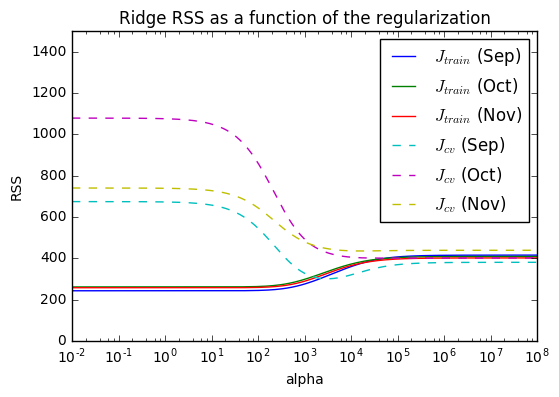

In [18]:
ax = plt.gca()

ax.plot(alphas, np.array(vRSS[0:200])/30.,label='$J_{train}$ (Sep)')
ax.plot(alphas, np.array(vRSS[200:400])/30.,label='$J_{train}$ (Oct)')
ax.plot(alphas, np.array(vRSS[400:600])/30.,label='$J_{train}$ (Nov)')
ax.plot(alphas, np.array(tRSS[0:200])/(nyear-30.),'--',label='$J_{cv}$ (Sep)')
ax.plot(alphas, np.array(tRSS[200:400])/(nyear-30.),'--',label='$J_{cv}$ (Oct)')
ax.plot(alphas, np.array(tRSS[400:600])/(nyear-30.),'--',label='$J_{cv}$ (Nov)')
total = (np.array(vRSS[0:200])+np.array(vRSS[200:400])+np.array(vRSS[400:600])+np.array(tRSS[0:200])+np.array(tRSS[200:400])+np.array(tRSS[400:600]))/6./nyear
#ax.plot(alphas, total,'--',label='average',linewidth=2.0)
print(alphas[np.argmin(total)])

plt.xlabel('alpha')
plt.ylabel('RSS')
plt.title('Ridge RSS as a function of the regularization')
plt.axis('tight')
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_ylim([0.,1500.])
plt.legend()

plt.show()   
#plt.savefig('Ridge.jpg', format='jpg', dpi=1000)

# This is for Lasso regression to find out the best alpha

In [62]:
n_alphas = 200
alphas = np.logspace(-2, 8, n_alphas)

vRSS1 = []
tRSS1 = []
for imonth in range(nmonth):
    for ia in range(len(alphas)):
        validation_RSS = 0.
        test_RSS = 0.
        reg = linear_model.Lasso (alpha = alphas[ia])
        
        for ilat in range(nlat):
            for ilon in range(nlon):
                reg.fit(x[0:30,:],y[0:30,imonth,ilat,ilon])
                predictY = reg.predict(x)
                
                validation_residuals = y[0:30,imonth,ilat,ilon]-predictY[0:30]
                validation_RSS = (validation_residuals**2).sum() + validation_RSS
                test_residuals = y[30:nyear,imonth,ilat,ilon]-predictY[30:nyear]
                test_RSS = (test_residuals**2).sum() + test_RSS
                del predictY
        vRSS1.append(validation_RSS)
        tRSS1.append(test_RSS)
        del reg,validation_RSS,test_RSS
print("completed!")

completed!


In [19]:
ax1 = plt.gca()

ax1.plot(alphas, np.array(vRSS1[0:200])/30.,label='$J_{train}$ (Sep)')
ax1.plot(alphas, np.array(vRSS1[200:400])/30.,label='$J_{train}$ (Oct)')
ax1.plot(alphas, np.array(vRSS1[400:600])/30.,label='$J_{train}$ (Nov)')
ax1.plot(alphas, np.array(tRSS1[0:200])/(nyear-30.),'--',label='$J_{cv}$ (Sep)')
ax1.plot(alphas, np.array(tRSS1[200:400])/(nyear-30.),'--',label='$J_{cv}$ (Oct)')
ax1.plot(alphas, np.array(tRSS1[400:600])/(nyear-30.),'--',label='$J_{cv}$ (Nov)')

total1 = (np.array(vRSS1[0:200])+np.array(vRSS1[200:400])+np.array(vRSS1[400:600])+np.array(tRSS1[0:200])+np.array(tRSS1[200:400])+np.array(tRSS1[400:600]))/6./nyear
#ax.plot(alphas, total,'--',label='average',linewidth=2.0)
print(alphas[np.argmin(total1)])

plt.xlabel('alpha')
plt.ylabel('RSS')
plt.title('Lasso RSS as a function of the regularization')
plt.axis('tight')
ax1.set_xscale('log')
#ax1.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax1.set_ylim([0.,1500.])
plt.legend()
plt.show()   
#plt.savefig('Lasso.jpg', format='jpg', dpi=1000)

NameError: name 'vRSS1' is not defined

# Ridge regression

In [20]:
a = alphas[np.argmin(total)]

predictY = np.zeros((nyear,nmonth,nlat,nlon))
                               
for imonth in range(nmonth):
    for ilat in range(nlat):
        for ilon in range(nlon):
            reg = linear_model.Ridge (alpha = a)
            reg.fit(x[0:30,:],y[0:30,imonth,ilat,ilon])
            predictY[:,imonth,ilat,ilon] = reg.predict(x)
            del reg
print("completed!")

completed!


In [21]:
pr = Dataset('predict.r.ridge.nc', 'w',format='NETCDF3_64BIT')
pr.description = 'predicted rainfall anomalies using Ridge regression'

pr.createDimension('year', nyear)
pr.createDimension('month', nmonth)
pr.createDimension('lat', nlat)
pr.createDimension('lon', nlon)

fyear = pr.createVariable('year', 'f', ('year',))
fmonth = pr.createVariable('month', 'f', ('month',))
flat = pr.createVariable('lat', 'f', ('lat',))
flon = pr.createVariable('lon', 'f', ('lon',))
newr = pr.createVariable('r', 'f4', ('year', 'month','lat','lon'),fill_value=predictY[0,0,0,0])

fyear[:] = f2.variables['year']
fmonth[:] = f2.variables['month']
flat[:] = f2.variables['lat'][lat_inds]
flon[:] = f2.variables['lon'][lon_inds]
newr[:,:,:,:] = predictY[:,:,:,:]
flat.units = "degrees_north"
flat.long_name = "Latitude"
flon.units = "degrees_east"
flon.long_name = "Longitude"
newr.long_name = 'predicted rainfall anomalies using Ridge regression'
pr.close()

# Lasso regression

In [153]:
a = alphas[np.argmin(total1)]

predictY = np.zeros((nyear,nmonth,len(lat),len(lon)))
                               
for imonth in range(nmonth):
    for ilat in range(len(lat)):
        for ilon in range(len(lon)):
            reg = linear_model.Lasso (alpha = a)
            reg.fit(x[0:30,:],r[0:30,imonth,ilat,ilon])
            predictY[:,imonth,ilat,ilon] = reg.predict(x)
            del reg
print("completed!")

completed!


In [154]:
pr = Dataset('predict.r.lasso.nc', 'w',format='NETCDF3_64BIT')
pr.description = 'predicted rainfall anomalies using Ridge regression'

pr.createDimension('year', nyear)
pr.createDimension('month', nmonth)
pr.createDimension('lat', len(lat))
pr.createDimension('lon', len(lon))

fyear = pr.createVariable('year', 'f', ('year',))
fmonth = pr.createVariable('month', 'f', ('month',))
flat = pr.createVariable('lat', 'f', ('lat',))
flon = pr.createVariable('lon', 'f', ('lon',))
newr = pr.createVariable('r', 'f4', ('year', 'month','lat','lon'),fill_value=predictY[0,0,0,0])

fyear[:] = f2.variables['year']
fmonth[:] = f2.variables['month']
flat[:] = f2.variables['lat']
flon[:] = f2.variables['lon']
newr[:,:,:,:] = predictY[:,:,:,:]
flat.units = "degrees_north"
flat.long_name = "Latitude"
flon.units = "degrees_east"
flon.long_name = "Longitude"
newr.long_name = 'predicted rainfall anomalies using Ridge regression'
pr.close()